In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded datasets
train_data = pd.read_csv('../../data/curated/train_data.csv')
predictions_data = pd.read_csv('../../data/curated/predictions_Lg.csv')

# Display the first few rows of both datasets for review
train_data.head(), predictions_data.head()

(   Year  Median  Bed  Apartment  postcode  park_count  mean_park_area  Camp  \
 0  2019     370    1          1      3206         2.0        109.9035   0.0   
 1  2019     350    1          1      3206         2.0        109.9035   0.0   
 2  2019     360    1          1      3206         2.0        109.9035   0.0   
 3  2019     515    2          1      3206         2.0        109.9035   0.0   
 4  2019     500    2          1      3206         2.0        109.9035   0.0   
 
    Language  Primary  Secondary  Special  school_total  tram_count  bus_count  \
 0       0.0      3.0        1.0      0.0           4.0        33.0        0.0   
 1       0.0      3.0        1.0      0.0           4.0        33.0        0.0   
 2       0.0      3.0        1.0      0.0           4.0        33.0        0.0   
 3       0.0      3.0        1.0      0.0           4.0        33.0        0.0   
 4       0.0      3.0        1.0      0.0           4.0        33.0        0.0   
 
    train_count  populat

In [7]:
from sklearn.preprocessing import MinMaxScaler
# Group by postcode and calculate the mean of each metric
grouped_predictions = predictions_data.groupby('postcode').agg({
    'predicted_rent': 'mean',
    'park_count': 'mean',
    'mean_park_area': 'mean',
    'tram_count': 'mean',
    'bus_count': 'mean',
    'train_count': 'mean',
    'school_total': 'mean',
    'population': 'mean',
    'income': 'mean'
}).reset_index()

# Reverse rental prices to make lower rents better
grouped_predictions['affordability'] = 1 / grouped_predictions['predicted_rent']

# Need to standardize the features
features_to_normalize = ['affordability', 'park_count', 'mean_park_area', 'tram_count', 'bus_count', 'train_count', 'school_total']

# Normalized eigenvalue
scaler = MinMaxScaler()
grouped_predictions[features_to_normalize] = scaler.fit_transform(grouped_predictions[features_to_normalize])

# Calculate the final habitability score (average of all standardized features)
grouped_predictions['livability_score'] = grouped_predictions[features_to_normalize].mean(axis=1)

# Sort by habitability score and output results
best_suburbs = grouped_predictions[['postcode', 'livability_score']].sort_values(by='livability_score', ascending=False)

# Export the top 5 most livable suburbs
print(best_suburbs.head())

     postcode  livability_score
157      3825          0.405128
144      3550          0.402351
146      3564          0.391631
131      3280          0.375406
152      3690          0.363805


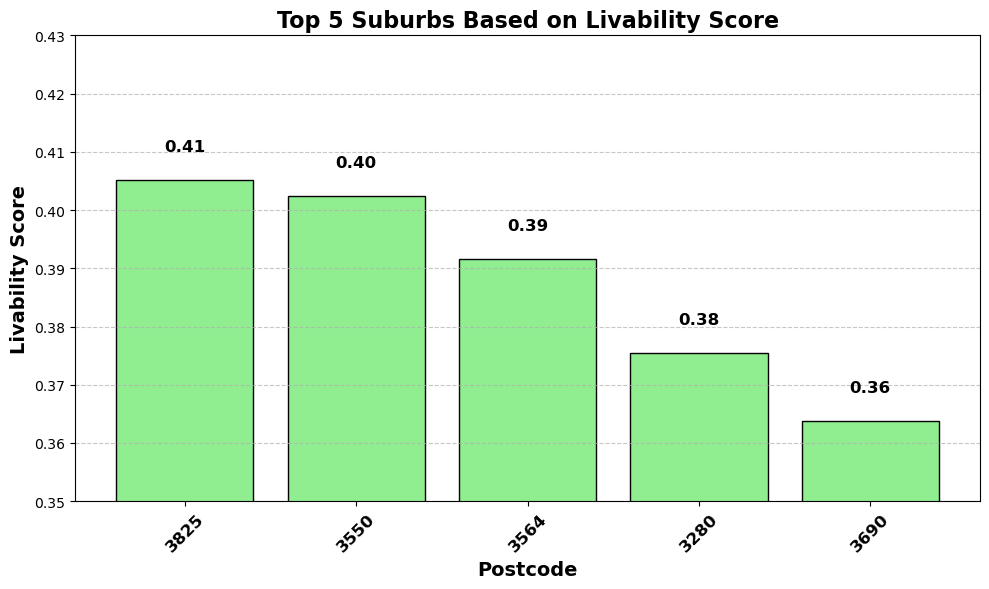

In [8]:
top_5_suburbs = best_suburbs.head()

# Enhanced plot with aesthetic improvements
plt.figure(figsize=(10, 6))
plt.bar(top_5_suburbs['postcode'].astype(str), top_5_suburbs['livability_score'], color='lightgreen', edgecolor='black')

# Adding titles and labels with enhanced fonts and layout
plt.title('Top 5 Suburbs Based on Livability Score', fontsize=16, fontweight='bold')
plt.xlabel('Postcode', fontsize=14, fontweight='bold')
plt.ylabel('Livability Score', fontsize=14, fontweight='bold')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.35, 0.43)

# Customizing x-ticks for clarity
plt.xticks(rotation=45, fontsize=12, fontweight='bold')

# Adding data labels on top of bars
for i, score in enumerate(top_5_suburbs['livability_score']):
    plt.text(i, score + 0.005, f'{score:.2f}', ha='center', fontsize=12, fontweight='bold')

# Adjust layout
plt.tight_layout()

plt.savefig("../../plots/Top 5 Suburbs Based on Livability Score.png")